In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chart24 = pd.read_csv("../Code/output/chart24Item17.csv")

In [3]:
chart24.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE
0,36,165660,FIO,2134-05-12T12:00:00.000-04:00,100.00
1,36,165660,PH,2134-05-12T12:35:00.000-04:00,7.29
2,36,165660,HR,2134-05-12T13:00:00.000-04:00,86.00
3,36,165660,SBP,2134-05-12T13:00:00.000-04:00,137.00
4,36,165660,DBP,2134-05-12T13:00:00.000-04:00,72.00


In [4]:
chart24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11377878 entries, 0 to 11377877
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 434.0+ MB


In [5]:
patients = pd.read_csv("../Code/output/patientsInfo.csv")

In [6]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG
0,22,165315,64.97,F,0
1,23,152223,71.18,M,0
2,23,124321,75.31,M,0
3,24,161859,39.04,M,0
4,25,129635,58.99,M,0


# Clean data--outliers

In [7]:
def chart_cleaning(df):
    # GLU
    df = df.drop(df[(df.ITEMID=='GLU') & (df.VALUE>5000)].index)
    # DBP
    df = df.drop(df[(df.ITEMID=='DBP') & (df.VALUE>1000)].index)
    df = df.drop(df[(df.ITEMID=='DBP') & (df.VALUE<0)].index)
    # FIO -- ignore
    # df = df.drop(df[(df.ITEMID=='FIO') & (df.VALUE>100)].index)
    # HEIGHT
    df = df.drop(df[(df.ITEMID=='HEIGHT') & (df.VALUE>300)].index)
    # HR
    df = df.drop(df[(df.ITEMID=='HR') & (df.VALUE>10000)].index)
    # MBP
    df = df.drop(df[(df.ITEMID=='MBP') & (df.VALUE>1000)].index)
    df = df.drop(df[(df.ITEMID=='MBP') & (df.VALUE<0)].index)
    # OS
    df = df.drop(df[(df.ITEMID=='OS') & (df.VALUE>10000)].index)
    # PH
    df = df.drop(df[(df.ITEMID=='PH') & (df.VALUE>10)].index) 
    # RESPR
    df = df.drop(df[(df.ITEMID=='RESPR') & (df.VALUE>1000)].index)
    # SBP
    df = df.drop(df[(df.ITEMID=='SBP') & (df.VALUE>1000)].index)
    # TEMP
    df = df.drop(df[(df.ITEMID=='TEMP') & (df.VALUE>50)].index) 
    df = df.drop(df[(df.ITEMID=='TEMP') & (df.VALUE<20)].index)
    # weight
    df = df.drop(df[(df.ITEMID=='WEIGHT') & (df.VALUE>1000)].index) 
    df = df.drop(df[(df.ITEMID=='WEIGHT') & (df.VALUE<10)].index)

    return df

In [8]:
# chart24 initially 11,377,877 entries

In [9]:
# GLU
chart24 = chart24.drop(chart24[(chart24.ITEMID=='GLU') & (chart24.VALUE>5000)].index) ## 11,377,875 entries

In [10]:
# DBP
chart24 = chart24.drop(chart24[(chart24.ITEMID=='DBP') & (chart24.VALUE>1000)].index) ## 11,377,827 entries

In [11]:
# FIO -- ignore
# chart24 = chart24.drop(chart24[(chart24.ITEMID=='FIO') & (chart24.VALUE>100)].index) ## 11,377,827 entries

In [12]:
# HEIGHT
chart24 = chart24.drop(chart24[(chart24.ITEMID=='HEIGHT') & (chart24.VALUE>300)].index) ## 11,377,821 entries

In [13]:
# HR
chart24 = chart24.drop(chart24[(chart24.ITEMID=='HR') & (chart24.VALUE>10000)].index) ## 11,377,820 entries

In [14]:
# MBP
chart24 = chart24.drop(chart24[(chart24.ITEMID=='MBP') & (chart24.VALUE>1000)].index) ## 11,377,817 entries

In [15]:
# OS
chart24 = chart24.drop(chart24[(chart24.ITEMID=='OS') & (chart24.VALUE>10000)].index) ## 11,377,817 entries

In [16]:
# PH
chart24 = chart24.drop(chart24[(chart24.ITEMID=='PH') & (chart24.VALUE>10)].index) ## 11,377,779  entries

In [17]:
# RESPR
chart24 = chart24.drop(chart24[(chart24.ITEMID=='RESPR') & (chart24.VALUE>1000)].index) ## 11,377,775  entries

In [18]:
# SBP
chart24 = chart24.drop(chart24[(chart24.ITEMID=='SBP') & (chart24.VALUE>1000)].index) ## 11,377,768  entries

In [19]:
# TEMP
chart24 = chart24.drop(chart24[(chart24.ITEMID=='TEMP') & (chart24.VALUE>50)].index) 
chart24 = chart24.drop(chart24[(chart24.ITEMID=='TEMP') & (chart24.VALUE<20)].index) ## 11,376,623  entries

In [20]:
# weight
chart24 = chart24.drop(chart24[(chart24.ITEMID=='WEIGHT') & (chart24.VALUE>1000)].index) 
chart24 = chart24.drop(chart24[(chart24.ITEMID=='WEIGHT') & (chart24.VALUE<10)].index) ## 11,376,536  entries

In [21]:
chart24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11376530 entries, 0 to 11377877
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 520.8+ MB


In [22]:
chart24_mean = chart24[['HADM_ID', 'ITEMID', 'VALUE']].groupby(['HADM_ID', 'ITEMID'], as_index=False).mean()

In [23]:
len(chart24_mean['HADM_ID'].unique()) ## 45824 admission, 14 itemid

45824

In [24]:
# pivot table to have each itemid as one column
chart24_pivot = chart24_mean.pivot(index='HADM_ID', columns = 'ITEMID', values='VALUE')

In [25]:
chart24_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,
100001,NaN,90.666667,NaN,175.571429,6.0,4.000000,NaN,5.0,NaN,111.760000,110.545455,97.833333,NaN,16.875000,177.041667,37.047619,98.010000
100003,NaN,57.593750,NaN,79.000000,6.0,3.857143,NaN,5.0,NaN,79.441176,70.031250,98.181818,7.37,15.058824,109.468750,36.246032,84.882500
100006,NaN,68.782609,NaN,160.200000,6.0,4.000000,15.0,5.0,NaN,111.958333,88.405796,97.880000,7.37,19.375000,127.652174,36.231482,57.000000
100007,NaN,62.558824,NaN,127.000000,6.0,3.900000,14.1,4.2,NaN,76.242424,87.878788,99.823529,NaN,16.205882,141.558824,36.825392,55.099998
100009,NaN,53.125000,70.0,142.526316,4.0,4.000000,NaN,3.4,182.94,78.478261,69.958333,97.185185,7.37,22.689655,114.833333,NaN,116.650000


In [26]:
chart24_pivot.describe()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
count,603.000000,45551.000000,11049.000000,44952.000000,45574.000000,44769.000000,25097.000000,45517.000000,7958.000000,45552.000000,45545.000000,45561.000000,25972.000000,45510.000000,45551.000000,44819.000000,34899.000000
mean,0.176731,60.753918,52.794358,139.665221,5.359049,3.469790,12.144194,3.594040,168.626629,85.141822,78.146019,97.121109,7.369242,18.084805,118.946055,36.813807,81.651078
std,0.346208,11.034646,25.518506,44.893403,1.120022,0.751136,3.357234,1.609497,15.098265,15.627219,11.421022,4.087233,0.143367,4.090390,17.280853,0.632944,24.445153
min,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,3.000000,1.000000,0.000000,26.357143,17.428571,13.500000,0.000000,2.000000,0.000000,30.000000,10.000000
25%,0.000000,53.290995,43.333333,111.400000,5.142857,3.200000,9.916667,2.000000,162.780000,74.172167,70.347826,96.120000,7.340000,15.261128,106.727273,36.435185,65.670000
50%,0.000000,59.739130,52.000000,129.759310,6.000000,3.833333,13.714286,4.333333,170.090000,84.068381,76.793096,97.513514,7.380000,17.500000,116.620000,36.788889,78.400002
75%,0.072917,67.113961,63.333333,156.250000,6.000000,4.000000,15.000000,5.000000,177.900000,95.095622,84.809524,98.658537,7.416000,20.285714,129.434783,37.182548,93.202500
max,1.388889,132.333333,1001.000000,786.222222,6.000000,4.000000,15.000000,5.000000,248.960000,215.575758,148.968750,497.608696,9.000000,49.555556,215.833333,40.833317,670.000000


# Null entry imputation

In [27]:
# null entry imputation-- CRR 0.0
chart24_pivot['CRR'].fillna(0.0, inplace=True)

In [28]:
# null entry imputation-- DBP 59.0
chart24_pivot['DBP'].fillna(59.0, inplace=True)

In [29]:
# null entry imputation-- FIO 0.21
chart24_pivot['FIO'].fillna(52, inplace=True)

In [30]:
# null entry imputation-- GLU 128
chart24_pivot['GLU'].fillna(128, inplace=True)

In [31]:
# null entry imputation-- GMR 6
chart24_pivot['GMR'].fillna(6, inplace=True)

In [32]:
# null entry imputation-- GO 4
chart24_pivot['GO'].fillna(4, inplace=True)

In [33]:
# null entry imputation-- GT 15
chart24_pivot['GT'].fillna(15, inplace=True)

In [34]:
# null entry imputation-- GVR 5
chart24_pivot['GVR'].fillna(5, inplace=True)

In [35]:
# null entry imputation-- HEIGHT 5
chart24_pivot['HEIGHT'].fillna(170, inplace=True)

In [36]:
# null entry imputation-- MBP 77
chart24_pivot['MBP'].fillna(77, inplace=True)

In [37]:
# null entry imputation-- HR 5
chart24_pivot['HR'].fillna(86, inplace=True)

In [38]:
# null entry imputation-- OS 98
chart24_pivot['OS'].fillna(98, inplace=True)

In [39]:
# null entry imputation-- PH 98
chart24_pivot['PH'].fillna(7.4, inplace=True)

In [40]:
# null entry imputation-- RESPR 98
chart24_pivot['RESPR'].fillna(19, inplace=True)

In [41]:
# null entry imputation-- SBP 118
chart24_pivot['SBP'].fillna(118, inplace=True)

In [42]:
# null entry imputation-- TEMP 36.6
chart24_pivot['TEMP'].fillna(36.6, inplace=True)

In [43]:
# null entry imputation-- WEIGHT 81
chart24_pivot['WEIGHT'].fillna(81, inplace=True)

In [44]:
chart24_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,
100001,0.0,90.666667,52.0,175.571429,6.0,4.000000,15.0,5.0,170.00,111.760000,110.545455,97.833333,7.40,16.875000,177.041667,37.047619,98.010000
100003,0.0,57.593750,52.0,79.000000,6.0,3.857143,15.0,5.0,170.00,79.441176,70.031250,98.181818,7.37,15.058824,109.468750,36.246032,84.882500
100006,0.0,68.782609,52.0,160.200000,6.0,4.000000,15.0,5.0,170.00,111.958333,88.405796,97.880000,7.37,19.375000,127.652174,36.231482,57.000000
100007,0.0,62.558824,52.0,127.000000,6.0,3.900000,14.1,4.2,170.00,76.242424,87.878788,99.823529,7.40,16.205882,141.558824,36.825392,55.099998
100009,0.0,53.125000,70.0,142.526316,4.0,4.000000,15.0,3.4,182.94,78.478261,69.958333,97.185185,7.37,22.689655,114.833333,36.600000,116.650000


In [45]:
chart24_pivot.isna().any()

ITEMID
CRR       False
DBP       False
FIO       False
GLU       False
GMR       False
GO        False
GT        False
GVR       False
HEIGHT    False
HR        False
MBP       False
OS        False
PH        False
RESPR     False
SBP       False
TEMP      False
WEIGHT    False
dtype: bool

# Combine label and data together

In [46]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG
0,22,165315,64.97,F,0
1,23,152223,71.18,M,0
2,23,124321,75.31,M,0
3,24,161859,39.04,M,0
4,25,129635,58.99,M,0


In [47]:
chart24_withlabel = chart24_pivot.join(patients[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']].set_index('HADM_ID'), how='left')

In [48]:
chart24_withlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45824 entries, 100001 to 199999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CRR                   45824 non-null  float64
 1   DBP                   45824 non-null  float64
 2   FIO                   45824 non-null  float64
 3   GLU                   45824 non-null  float64
 4   GMR                   45824 non-null  float64
 5   GO                    45824 non-null  float64
 6   GT                    45824 non-null  float64
 7   GVR                   45824 non-null  float64
 8   HEIGHT                45824 non-null  float64
 9   HR                    45824 non-null  float64
 10  MBP                   45824 non-null  float64
 11  OS                    45824 non-null  float64
 12  PH                    45824 non-null  float64
 13  RESPR                 45824 non-null  float64
 14  SBP                   45824 non-null  float64
 15  TEMP         

# Logistic model

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
X = chart24_withlabel.loc[:, 'CRR':'WEIGHT']
Y = chart24_withlabel.loc[:,'HOSPITAL_EXPIRE_FLAG']

In [51]:
# normolize X data
X = StandardScaler().fit(X).transform(X)

In [52]:
# split data to 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [53]:
# 5-fold cv score
logit = LogisticRegression(solver='liblinear')
logit_cv_score = cross_val_score(logit, X_train, Y_train, cv=5)
logit_cv_score = np.mean(logit_cv_score)
print(logit_cv_score)

0.9044708839436562


In [54]:
# predict the test data
logit.fit(X_train, Y_train)
logit_preds = logit.predict(X_test)
logit_accu = accuracy_score(Y_test, logit_preds)
logit_matrix = confusion_matrix(Y_test, logit_preds)

In [55]:
logit.coef_

array([[ 0.00854004, -0.40276758,  0.11058942,  0.18205698, -0.38768515,
        -0.16850873, -0.00472161, -0.59311521,  0.01237138,  0.26791467,
         0.09352379, -0.73409075, -0.05506645,  0.40783438, -0.07030225,
        -0.35500468, -0.28414276]])

In [56]:
logit_accu

0.9078014184397163

In [57]:
logit_matrix

array([[8091,  106],
       [ 739,  229]])

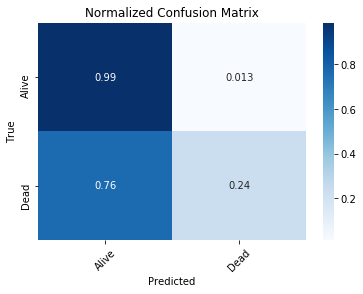

In [86]:
from plots import plot_confusion_matrix
results = [(i[0], i[1]) for i in zip(Y_test, logit_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results, class_names)

In [61]:
logit_probs = logit.predict_proba(X_test)
metrics.roc_auc_score(Y_test, logit_probs[:, 1])

0.8474399019193678

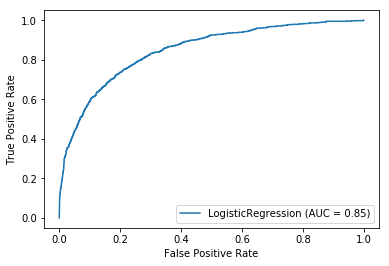

In [58]:
# auc curve
from sklearn import metrics
metrics.plot_roc_curve(logit, X_test, Y_test)  
plt.show()

## SVC model

In [68]:
# use C=1 to build the SVM model
svc = SVC(C=1, gamma="scale", probability=True)
svc.fit(X_train, Y_train)
svc_preds = svc.predict(X_test)
svc_accu = accuracy_score(Y_test, svc_preds)
svc_matrix = confusion_matrix(Y_test, svc_preds)

In [69]:
svc_accu

0.9151118385160938

In [70]:
svc_matrix

array([[8116,   81],
       [ 697,  271]])

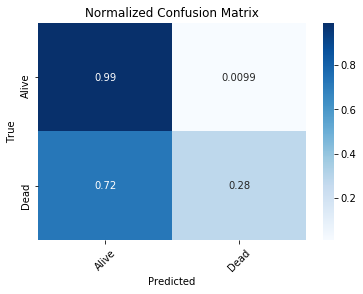

In [87]:
from plots import plot_confusion_matrix
results_svc = [(i[0], i[1]) for i in zip(Y_test, svc_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results_svc, class_names)

In [88]:
svc_probs = svc.predict_proba(X_test)
metrics.roc_auc_score(Y_test, svc_probs[:, 1])

0.801275436387229

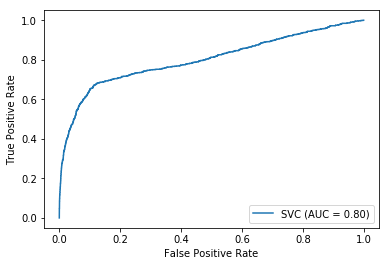

In [89]:
metrics.plot_roc_curve(svc, X_test, Y_test)  
plt.show()